# Exploratory Data Analysis

In [1]:
#Import EDA Libraries
import pandas as pd
import numpy as np

In [2]:
#Imporing Unlabelled Dataset
data = pd.read_excel('university.xlsx')

In [3]:
data.head()

,University,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Harvard University,1310,89,22,13,22704,94
1,California Institute of Technology,1415,100,25,6,63575,81
2,Massachusetts Institute of Technology,1260,62,59,9,25026,72
3,Stanford University,1310,76,24,12,31510,88
4,Princeton University,1280,83,33,13,21864,90


In [7]:
data.shape

(100, 7)

In [8]:
#Checking for NULL values
data.isnull().sum()

University    0
SAT           0
Top10         0
Accept        0
SFRatio       0
Expenses      0
GradRate      0
dtype: int64

In [18]:
data_new = data.iloc[:,1:]

In [19]:
data_new.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


# Data Preprocessing

In [20]:
from sklearn.preprocessing import normalize

In [21]:
# Data Normalizing
data_new = normalize(data_new)

In [22]:
data_new

array([[5.76023081e-02, 3.91343925e-03, 9.67367005e-04, 5.71625958e-04,
        9.98322750e-01, 4.13329539e-03],
       [2.22516183e-02, 1.57255253e-03, 3.93138133e-04, 9.43531519e-05,
        9.99750272e-01, 1.27376755e-03],
       [5.02834427e-02, 2.47426464e-03, 2.35454216e-03, 3.59167448e-04,
        9.98724949e-01, 2.87333958e-03],
       [4.15379241e-02, 2.40983377e-03, 7.61000137e-04, 3.80500068e-04,
        9.99129763e-01, 2.79033384e-03],
       [5.84426668e-02, 3.78964168e-03, 1.50672500e-03, 5.93558335e-04,
        9.98273803e-01, 4.10925001e-03],
       [6.19998797e-02, 3.62814111e-03, 1.01036841e-03, 1.37777510e-03,
        9.98060285e-01, 3.94962196e-03],
       [2.69718106e-02, 1.61830864e-03, 4.81639476e-04, 4.43108318e-04,
        9.99633099e-01, 1.77243327e-03],
       [5.00059974e-02, 2.91079686e-03, 9.32947713e-04, 7.09040262e-04,
        9.98739185e-01, 3.09738641e-03],
       [2.76736953e-02, 1.74805131e-03, 4.08635370e-04, 5.44847160e-04,
        9.99612923e-01, 

# Machine Learning Model

In [23]:
#Importing Machine Learning Model
from sklearn.cluster import KMeans

In [24]:
model = KMeans(n_clusters = 3)

In [25]:
model.fit(data_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
model.labels_

array([0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 0,
       0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1,
       2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2])

In [27]:
#Checking for the labelled clusters
cluster = pd.DataFrame(model.labels_)

In [28]:
cluster.head()

,0
0,0
1,1
2,0
3,2
4,0


In [29]:
#Creating a new Column and updating it with the labels
data['Tier'] = cluster

In [30]:
data.head()

,University,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Tier
0,Harvard University,1310,89,22,13,22704,94,0
1,California Institute of Technology,1415,100,25,6,63575,81,1
2,Massachusetts Institute of Technology,1260,62,59,9,25026,72,0
3,Stanford University,1310,76,24,12,31510,88,2
4,Princeton University,1280,83,33,13,21864,90,0


In [31]:
#Rearranging the columns in the Dataset
new = data.iloc[:,[0,7,1,2,3,4,5,6]]

In [32]:
new.head()

,University,Tier,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Harvard University,0,1310,89,22,13,22704,94
1,California Institute of Technology,1,1415,100,25,6,63575,81
2,Massachusetts Institute of Technology,0,1260,62,59,9,25026,72
3,Stanford University,2,1310,76,24,12,31510,88
4,Princeton University,0,1280,83,33,13,21864,90


In [33]:
new1 = new.groupby('Tier')

In [34]:
new1.mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Tier,,,,,,
0,1285.500000,82.050000,27.950000,20.800000,24110.700000,86.500000
1,1279.956522,81.260870,26.130435,19.326087,58219.217391,87.978261
2,1274.970588,81.441176,27.529412,19.500000,38257.882353,87.941176


# Data Visualization

In [35]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

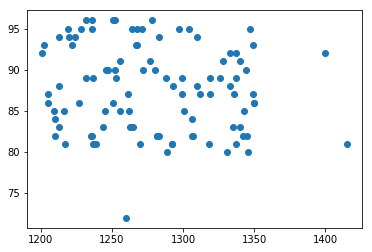

In [36]:
plt.scatter(x= data.SAT,y = data.GradRate)

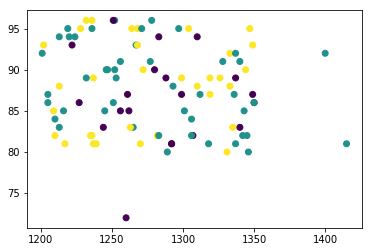

In [37]:
plt.scatter(x= data.SAT,y = data.GradRate,c = model.labels_)